<h1 style='text-aling:center;color:Navy'>  Big Data Systems - Laboratory 1  </h1>

Topics included in this lab: 
- 1) Map-Reduce (20 minutes) 
- 2) Semistructured DS: Spanner DB (20 minutes) 
- 3) Bigtable (20 minutes)


This is the first Lab for the Big Data Systems course - Fall 2021.
We are covering the following topics:

- Map-Reduce
- Spanner
- Bigtable

#In order to do this lab, you will need to open a terminal inside the browser.

#Click on New -> Terminal

#You will see the terminal. Looks like this.
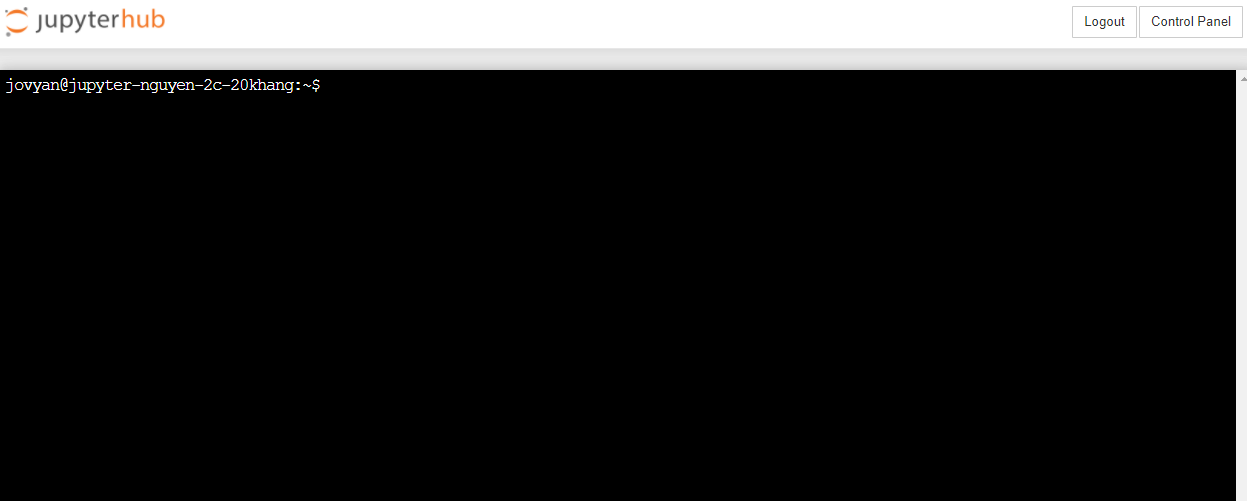
#Now you need to ssh into node5.
```
ssh ucdenver@node5
password: ucdenver
```
#Make a directory in hadoop environment
```
sudo -u hdoop /home/hdoop/hadoop-2.10.1/bin/hadoop dfs  -mkdir /user/<firstname_lastname>
```
```
e.g: sudo -u hdoop /home/hdoop/hadoop-2.10.1/bin/hadoop dfs  -mkdir /user/khang_nguyen
```
You can see your directory here http://node5.ucdenver.pvt:50070/explorer.html#/user/<firstname_lastname>
#Make a subdirectory inside <firstname_lastname> in hadoop environment
```
sudo -u hdoop /home/hdoop/hadoop-2.10.1/bin/hadoop dfs  -mkdir /user/<firstname_lastname>/input
e.g: sudo -u hdoop /home/hdoop/hadoop-2.10.1/bin/hadoop dfs  -mkdir /user/khang_nguyen/input
```
#Make a directory with your name
```
mkdir <firstname_lastname>
e.g: mkdir khang_nguyen
```

# Word Count Example
<hr>
## Map/Reduce Classes
We have three classes available:<br>
<li>WordCount.Java              *#Main program*
<li>WordcountMapper.java        *#Implementation of the Map*
<li>WordCountReducer.java       *#Implementation of the Reduce*
<br>
Take a look at the Main program, try to identify where the files are loaded.
<br>
In the same fashion, inspect the Mapper and the Reduccer class to identify the emit and the collect steps on the code. 
<br> 
Now, let's run the WordCount:
    
### Transfer 
    WordCount.Java
    WordcountMapper.java
    WordCountReducer.java
    hamlet.txt
 to ucdenver@node5/<firstname_lastname> folder
```
winscp transfer file folder to <firstname_lastname>
```
    
e.g:
```    
```
### Compiling:
    
``` 
cd <firstname_lastname>
e.g: cd khang_nguyen
    
ucdenver@node5:~/khang_nguyen$ export HADOOP_CLASSPATH=$(/home/hdoop/hadoop-2.10.1/bin/hadoop classpath)
ucdenver@node5:~/khang_nguyen$ javac -classpath ${HADOOP_CLASSPATH}  *.java
```
### Making the JAR
```
ucdenver@node5:~/khang_nguyen$ jar cf WordCount.jar WordCount*.class
```
### Upload file to Hadoop file system
ucdenver@node5:~/khang_nguyen$ sudo -u hdoop /home/hdoop/hadoop-2.10.1/bin/hadoop fs -put hamlet.txt /user/<firstname_lastname>/input 
### Running hadoop Program
```
sudo -u hdoop /home/hdoop/hadoop-2.10.1/bin/hadoop jar WordCount.jar WordCount /user/<firstname_lastname>/input /user/<firstname_lastname>/output/1
e.g: sudo -u hdoop /home/hdoop/hadoop-2.10.1/bin/hadoop jar WordCount.jar WordCount /user/khang_nguyen/input /user/khang_nguyen/output/1
```    
###Verify the output here 
```
http://node5.ucdenver.pvt:50070/explorer.html#/user/<firstname_lastname>
e.g: http://node5.ucdenver.pvt:50070/explorer.html#/user/khang_nguyen
```
## Paste your output in the next cell

In [ ]:
##### OUTPUT Goes HERE #####

- Using the _**hdfs dfs -cat**_ bring the files in the output directory of the HDFS.
- Using the _**head**_ command extract the first 10 rows of one of the output files. 
Hint: Linux Pipeline command 
## Paste your output in the next cell

##### OUTPUT Goes HERE #####

- Inspect the output by using the commands cat, grep, tail, head.
- Did you notice any issues on how the counting was done? For example, look a the word "them". Was the output as you expected to be?
- If not, how can you address the problem. 

## Write your answer in the next cell. You don't need to implement the actual response. 

##### OUTPUT Goes HERE #####

## <span style="color:RED">Homework: </span> Department monthly sales
<hr>
Based on the map-reduce example above, do the proper modifications to solve the following problem:
<br>
We are going to be using the Walmart Store Sales Forecasting competition training dataset available [here](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data). Considering this dataset, you should produce a monthly summary of the sales per department. <br>
So you output should be like:
<pre>
dept-year-month:$$$
</pre>
1. Download the training dataset and upload it to your server for processing. Be careful with the paths you use.
2. Using the three provided java classes as a template, create three new classes: __*Walmart.java, WalmartMapper.java, WalmartReducer.java*__ with the proper code.
3. Fill in the following and submit all your files on Canvas to the Assignment 1.

Complete the following:


### 1. Place your map function in the next cell:  <span style="font-size:12px">(Only the function) </span>



##### OUTPUT Goes HERE #####

### 2. Place your reduce function in the next cell:  <span style="font-size:12px">(Only the function) </span>



##### OUTPUT Goes HERE #####

### 3. Place your running output in the next cell:  <span style="font-size:12px"> </span>



##### OUTPUT Goes HERE #####

### 4. Place the first 10 rows of your exit in the next cell:  <span style="font-size:12px">(take a look at the _wc_ linux command) </span>



##### OUTPUT Goes HERE #####

# <span style="color:#3665af">Section #2: Spanner </span><span style="font-size:15px">(Estimated time: 20 minutes) </span>

<hr>
In this section we will practice how to use Google's Spanner database. 
## Pre-reqs:
Your Google cloud account should be ready to deploy services.<br>

### Create a Spanner Instance.

- Create a spanner instace, and annotate the Instance ID. 
- We will use lab1-section2 as instance id in this lab; if you are using another id, you need to change in the connection settings. 
- For this test, configuring one node will suffice. 

### Installing the Python Client. 
We need to have the google-cloud library installed in our system.<br>
Open the terminal under New -> Terminal
Then execute the following pip command to install the client library. 

``` bash
$> pip install google
$> pip install google-cloud
$> pip install google-cloud-datastore --user
$> pip install google-cloud-spanner
```

### Getting the Service Account File
As mentioned in the cloud setup instructions, you need to generate a token file so you will be able to connect to spanner. Refer to that document for help. <br>
Here is the summary of the steps. 
1. Go to APIS & Services
2. Go to Credentials
3. Select Create Credentials, and choose Service account key.
4. Select Compute Engine default service account and Key type JSON. Then Create. 
5. Pick the file that was automatically downloaded, and store it in your BSD directory. 


## Hands on...

In [ ]:
# Imports the Google Cloud Client Library.
from google.cloud import spanner

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="bigdatasystems-fall2021-325819-e64d042b5422.json"

You can learn more about creating instances and using Spanner with Python at [Google Documentation](https://cloud.google.com/spanner/docs/getting-started/python/)


In [ ]:
def explicit():
    ## Function to connect to spanner
    from google.cloud import storage

    # Explicitly use service account credentials by specifying the private key
    # file.
    storage_client = storage.Client.from_service_account_json(JSON_SERVICE_KEY)

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

You can get help about authentication at [Google Documentation](https://cloud.google.com/docs/authentication/production#auth-cloud-explicit-python)


## Warm up
<hr>

In [ ]:

# Instantiate a client.
spanner_client = spanner.Client()

# Your Cloud Spanner instance ID.
instance_id = 'lab1-section2'

# Get a Cloud Spanner instance by ID.
instance = spanner_client.instance(instance_id)

# Your Cloud Spanner database ID.
database_id = 'lab1-db'           # If you did not create the database already, createit using the cloud console

# Get a Cloud Spanner database by ID.
database = instance.database(database_id)

# Execute a simple SQL statement.
with database.snapshot() as snapshot:
    results = snapshot.execute_sql('SELECT current_date')

    for row in results:
        print(row)

If you didn't recevie an error and the current date was displayed, it means that at this point we're connected to our Spanner database.<rb>

### Let's create a couple of tables
This may take a minute. If you use your google cloud dashboard, you can see the two new tables as you refresh the page.

In [ ]:
operation =database.update_ddl(ddl_statements=[
    """CREATE TABLE Singers (
        SingerId     INT64 NOT NULL,
        FirstName    STRING(1024),
        LastName     STRING(1024),
        SingerInfo   BYTES(MAX)
    ) PRIMARY KEY (SingerId)"""
    ,
    """CREATE TABLE Albums (
        SingerId     INT64 NOT NULL,
        AlbumId      INT64 NOT NULL,
        AlbumTitle   STRING(MAX)
    ) PRIMARY KEY (SingerId, AlbumId),
      INTERLEAVE IN PARENT Singers ON DELETE CASCADE"""
])

# operation = database.create()

print('Waiting for operation to complete...')
operation.result()

print('Created tables in database {} on instance {}'.format( database_id, instance_id))

### QUESTION:
**_In which line the command that creates the database is actually executed on Spanner?_** Explain briefly. 

#### <span style="color:red"> --- Answer HERE --- </span>

### Let's insert some data

In [ ]:

"""Inserts sample data into the given database.
   The database and table must already exist.
"""

with database.batch() as batch:
    batch.insert(
        table='Singers',
        columns=('SingerId', 'FirstName', 'LastName',),
        values=[
            (1, u'Marc', u'Richards'),
            (2, u'Catalina', u'Smith'),
            (3, u'Alice', u'Trentor'),
            (4, u'Lea', u'Martin'),
            (5, u'David', u'Lomond')])
    batch.commit
    
    batch.insert(
        table='Albums',
        columns=('SingerId', 'AlbumId', 'AlbumTitle',),
        values=[
            (1, 1, u'Total Junk'),
            (1, 2, u'Go, Go, Go'),
            (2, 1, u'Green'),
            (2, 2, u'Forever Hold Your Peace'),
            (2, 3, u'Terrified')])
    batch.commit
print('Inserted data.')

### QUESTION:
**_How many statements were executed in Spanner?_** Explain briefly. 

#### <span style="color:red"> --- Answer HERE --- </span>

### Querying the database

In [ ]:
"""Queries sample data from the database using SQL."""


with database.snapshot() as snapshot:
    results = snapshot.execute_sql(
        'SELECT SingerId, AlbumId, AlbumTitle FROM Albums')
    
    display(results)
    
    for row in results:
        display(row)
        print('SingerId: {}, AlbumId: {}, AlbumTitle: {}'.format(*row))
        #print("SingerId: ",row[0],", AlbumId: ",row[1],", AlbumTitle: ",row[2], )

### QUESTIONS:
1. **What kind of object is _results_?**
2. **What kind of object is _row_?**
3. **How is row being accessed?** _**Tip**_: take a look at the commented line.

#### <span style="color:red"> --- Answer HERE --- </span>
1. answer
2. answer
3. answer

In [ ]:
"""Reads sample data from the database."""

with database.snapshot() as snapshot:
    keyset = spanner.KeySet(all_=True)
    results = snapshot.read(
        table='Albums',
        columns=('SingerId', 'AlbumId', 'AlbumTitle',),
        keyset=keyset,)

    for row in results:
        print('SingerId: {}, AlbumId: {}, AlbumTitle: {}'.format(*row))

### QUESTIONS:
**_What is the difference between the first and second part of the code?_**

#### <span style="color:red"> --- Answer HERE --- </span>

## Let's load some interesting data
<hr>

In [ ]:
import pandas as pd
import datetime
from time import time

In [ ]:

# Instantiate a client.
spanner_client = spanner.Client()

# Your Cloud Spanner instance ID.
instance_id = 'lab1-section2'

# Get a Cloud Spanner instance by ID.
instance = spanner_client.instance(instance_id)

# Your Cloud Spanner database ID.
database_id = 'lab1-db'                             ## Create new Database

# Get a Cloud Spanner database by ID.
database = instance.database(database_id)

# Execute a simple SQL statement.
with database.snapshot() as snapshot:
    results = snapshot.execute_sql('SELECT current_date')

    for row in results:
        print(row)

In [ ]:
start_time=time()
operation =database.update_ddl(ddl_statements=[
    """CREATE TABLE RadiationMeasurements
        (
           CapturedTime timestamp,
           Latitude float64,
           Longitude float64,
           Value float64,
           Unit String(2048),
           Location String(2048),
           DeviceID String(2048),
           MD5Sum String(2048),
           Height String(2048),
           Surface String(2048),
           Radiation String(2048),
           UploadedTime timestamp,
           LoaderID float64
        )PRIMARY KEY (CapturedTime,Latitude,Longitude,Location,UploadedTime,MD5Sum)"""
])

# operation = database.create()

print('Waiting for operation to complete...')
operation.result()

print('Created tables in database {} on instance {}'.format(
    database_id, instance_id))

end_time=time()

print ("run time:",end_time-start_time)

In [ ]:
df_Measures        = pd.read_csv("radiation.measurements.sample.csv")

In [ ]:
df_Measures.info()

In [ ]:
myData=[]
for index,row in df_Measures[0:5].iterrows():
    aDateTime = datetime.datetime.strptime(row["Captured Time"], '%Y-%m-%d %H:%M:%S')
    display('Row: {}, Timestamp: {} Lat/Lon:{}/{}'.format(index,aDateTime,row["Latitude"],row["Longitude"]))
    myData.append( (index,aDateTime)  )
myData

In [ ]:
#     ****************************************************************
#     TO-DO: Write here a while/for to insert the Primary key data for the first 10 rows. 
#     ****************************************************************

# --Hints:
#     Adapt the code from the sample. 
#     Generate an array inserting tuples (you should use an array and the function append )


### Write your code here.

        

# <span style="color:#5DB664">DELETE YOUR SPANNER INSTANCE AS WHEN YOU FINNISHED </span>

# <span style="color:RED">Homework: </span> Yelp Dataset
<hr>
Similar to the example above, we are going to be using the Yelp competition dataset available [here](https://www.kaggle.com/yelp-dataset/yelp-dataset/data). <br>
You should:
1. Download the dataset to your machine.
2. Create a new database.
3. Create the tables necessary, with the proper interleaving configuration to store the business and reviews.
4. Load the yelp_business dataset.
5. Load 10% of the yelp_review dataset.

Hints:
- You probably want to do several batchs. You can do that by using the **[start:end]** operator for the dataframes. 
- You may need to review the documentation for the [Spanner SQL](https://cloud.google.com/spanner/docs/query-syntax)

## Questions:
1. Report the time for loading each dataset.
2. Compare the time to load the rows for the business and the reviews datasets.
3. List the top 10 better/most rated businesses in Colorado. To simplify this, let's assume that the best rated business is the one with the higher sum of ratings. 



In [ ]:
## PLACE YOUR CODE STARTING THIS POINT. 

# <span style="color:#3665af">Section #3: Bigtable </span><span style="font-size:15px">(Estimated time: 20 minutes) </span>

<hr>
In this section we will practice how to use Google's Bigtable database. 
## Pre-reqs:
Your Google cloud account should be ready to deploy services.<br>

### Create a Bigtable Instance

- Create a development Bigtable instace, and annotate the Instance ID. 
- We will use lab1-section3 instance id in this lab; if you are using another id, you need to change in the connection settings. 
- For this test, use a development instance, which has only one node but is way cheaper. 


### Installing the Python Client
We need to have the google cloud library installed in our system.<br>
If you are using windows/mac, go to the Anaconda navigator, then Environments. Click the arrow next to _base (root)_ and select Open terminal. <br>
Then execute the following pip command to install the client library. 

<pre>
$> pip install google-cloud-bigtable --user
$> pip install google-cloud-happybase
</pre>

### Getting the Service Account File
As mentioned in the cloud set up instructions, you need to generate a token file so you will be able to connect to bigtable. Refer to that document for help, especially if you did not manage to implement lab 1 section #2

Documentation [here](http://google-cloud-python.readthedocs.io/en/latest/bigtable/usage.html)

## Hands on...

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="bigdatasystems-fall2021-325819-e64d042b5422.json"

You can learn more about creating instances and using Spanner with Python at [Google Documentation](https://cloud.google.com/spanner/docs/getting-started/python/)


In [ ]:
def explicit():
    ## Function to connect to spanner
    from google.cloud import storage

    # Explicitly use service account credentials by specifying the private key
    # file.
    storage_client = storage.Client.from_service_account_json(JSON_SERVICE_KEY)

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

You can get help about authentication at [Google Documentation](https://cloud.google.com/docs/authentication/production#auth-cloud-explicit-python)


## Warm up
<hr>

In [ ]:
instance_id = "lab1-section3"

## <span style="color:#5DB664">Using Bigtable Client</span>

In [ ]:
# Imports the Google Cloud Client Library.
from google.cloud import bigtable

# The client must be created with admin=True because it will create a table.
client     = bigtable.Client(admin=True)
instance   = client.instance(instance_id)


If you didn't receive an error, it means that at this point we're connected to our Bigtable database else you should follow instruction in Google Cloud document<rb>

### Let's create a table

In [ ]:
table_name  = "greetings"
print('Creating the {} table.'.format(table_name))

table = instance.table(table_name)
table.create()

column_family_name = 'cf1'
cf1 = table.column_family(column_family_name)
cf1.create()

#table.delete()  #to delete the table.

print("done!")
### WARNING
#
## You will get an error the first time saying that you did not enable admin api. 
## A link will be given. Follow it and enable the API And retry.

### Inserting data

In [ ]:
print('Writing some greetings to the table.')
column_name = 'greeting'.encode('utf-8')
greetings = [
    'Hello World!',
    'Hello Cloud Bigtable!',
    'Hello Bigtable with Python!',
]

for i, value in enumerate(greetings):
    row_key = 'greeting{}'.format(i)
    row = table.row(row_key)
    row.set_cell(   
                    column_family_name,
                    column_name,
                    value.encode('utf-8')
                )
    row.commit()
    

print('done!')

### Reading data

In [ ]:
print('Getting a single greeting by row key.')
key = 'greeting0'

row = table.read_row(key.encode('utf-8'))

value = row.cells[column_family_name][column_name][0].value

print('\t{}: {}'.format(key, value.decode('utf-8')))

In [ ]:
print('Scanning for all greetings:')
partial_rows = table.read_rows()
partial_rows.consume_all()

for row_key, row in partial_rows.rows.items():
    key = row_key.decode('utf-8')
    cell = row.cells[column_family_name][column_name][0]
    value = cell.value.decode('utf-8')
    print('\t{}: {}'.format(key, value))

<hr>

## <span style="color:#5DB664">Using Happybase Client</span>

In [ ]:
# Imports the Google Cloud Client Library.
from google.cloud import happybase

# The client must be created with admin=True because it will create a table.

#client     = bigtable.Client(project=project_id, admin=True)
client = bigtable.Client(admin=True)
instance   = client.instance(instance_id)
connection = happybase.Connection(instance=instance)

I you didn't receive an error, it means that at this point we're connected to our Bigtable database.<rb>

### Let's create a table

In [ ]:
table_name  = "greetings2"
print('Creating the {} table.'.format(table_name))
column_family_name = 'cf1'
connection.create_table(    table_name,
                            {
                                column_family_name: dict()     # Use default options.
                            }
                       )
### WARNING
#
## You will get an error the first time saying that you did not enable admin api. 
## A link will be given. Follow it and enable the API And retry.

### Inserting data

In [ ]:
print('Writing some greetings to the table.')
table = connection.table(table_name)
column_name = '{fam}:greeting'.format(fam=column_family_name)
greetings = [
    'Hello World!',
    'Hello Cloud Bigtable!',
    'Hello HappyBase!',
]

for i, value in enumerate(greetings):
    row_key = 'greeting{}'.format(i)
    table.put(row_key, {(column_name).encode('utf-8'): value.encode('utf-8')})

print('done!')

### Reading data

In [ ]:
print('Getting a single greeting by row key.')
key = 'greeting0'.encode('utf-8')
row = table.row(key)
print('\t{}: {}'.format(key, row[column_name.encode('utf-8')]))


In [ ]:
print('Scanning for all greetings:')

for key, row in table.scan():
    print('\t{}: {}'.format(key, row[column_name.encode('utf-8')]))

#     print('Deleting the {} table.'.format(table_name))
#     connection.delete_table(table_name)


In [ ]:
connection.close()

<hr>

## Let's load some interesting data
<hr>
**We will use the bigtable client but it can be done using happybase too.**

In [ ]:
import pandas as pd
import datetime
from time import time
import math

In [ ]:
df_Measures        = pd.read_csv("radiation.measurements.sample.csv",keep_default_na=False)

In [ ]:
df_Measures   

In [ ]:
# The client must be created with admin=True because it will create a table.
client     = bigtable.Client(admin=True)
instance   = client.instance(instance_id)


In [ ]:
table_name  = "RadiationMeasurements"
table_columns = [
                    ("time","Captured Time"),("time","Uploaded Time"),
                    ("location","Latitude"),("location","Longitude"),("location","Height"),
                    ("measure","Value"),("measure","Unit"),
                    ("device","Device ID")
                ]

print('Creating the {} table.'.format(table_name))

RadiationMeasurements = instance.table(table_name)
RadiationMeasurements.create()


columnFamilies = []
for aColumn in table_columns:
    columnFamilies.append(aColumn[0])
columnFamilies = list(set(columnFamilies))

for aColumnFamily in columnFamilies:
    cf = RadiationMeasurements.column_family(aColumnFamily)
    cf.create()
     

print("done!")
### WARNING
#
## You will get an error the first time saying that you did not enable admin api. 
## A link will be given. Follow it and enable the API And retry.

In [ ]:
columnFamilies

In [ ]:

column_family_list = RadiationMeasurements.list_column_families()
print(column_family_list)

In [ ]:
RadiationMeasurements.delete()   #UNCOMMENT IF YOU NEED TO DROP THE TABLE. 

In [ ]:
for index,dfRow in df_Measures.iterrows():
    row_key = 'measurement_{}'.format(index)
    row = RadiationMeasurements.row(row_key)
    

    for aColumn in table_columns:  #([0],[1]) maps to (columnFamily,columnName)
        row.set_cell(   
                        aColumn[0],
                        aColumn[1],
                        str(dfRow[aColumn[1]]).encode('utf-8')
                    )
    row.commit()

print('done!')

In [ ]:
print('Scanning 5 Measurements:')
partial_rows = RadiationMeasurements.read_rows(limit=5)
partial_rows.consume_all()
for row_key, row in partial_rows.rows.items():
    key   = row_key.decode('utf-8')
    rowArr = []
    for aColumn in table_columns:
        rowArr.append(row.cells[aColumn[0]][aColumn[1].encode("utf-8")][0].value)
    print("Key:",key)
    for i in range(len(table_columns)):
        print("Data:",table_columns[i][0],table_columns[i][1],":",rowArr[i])

In [ ]:
print('Scanning measurement 3 to 5:')
partial_rows = RadiationMeasurements.read_rows(start_key="measurement_3",end_key="measurement_5")
partial_rows.consume_all()

for row_key, row in partial_rows.rows.items():
    key   = row_key.decode('utf-8')
    rowArr = []
    for aColumn in table_columns:
        rowArr.append(row.cells[aColumn[0]][aColumn[1].encode("utf-8")][0].value)
    print("Key:",key)
    for i in range(len(table_columns)):
        print("      Data:",table_columns[i][0],table_columns[i][1],":",rowArr[i])

### QUESTION:
**_In which line is the data actually fetched from Bigtable?_** Explain briefly. 

#### <span style="color:red"> --- Answer HERE --- </span>

In [ ]:
print('Sum all Measurements that the unit is cpm:')

###############
####    TO DO HERE
##############

print ("The sum is:", totalSum)

# <span style="color:#5DB664">DELETE YOUR BIGTABLE INSTANCE AS WHEN YOU FINNISH </span>

<hr><BR>

# <span style="color:RED">Homework: </span> Yelp Dataset
<hr>
Similar to the example above, we are going to be using the New York City - Buildings competition dataset available [here](https://www.kaggle.com/new-york-city/nyc-buildings/data). <br>
You should:
1. Download the dataset to your machine.
2. Create a new database.
3. Create the necessary tables to load the Brooklyn subset.
4. Load the Brooklyn dataset, but be smart when uploading. If we don't have a value for a particular cell, don't load it into Bigtable.


## Questions:
1. Report the time for loading the dataset.
2. Generate a report that for each zipcode displays the average of the lot and building front area. <br>
In this query the performance is very important as you are reading a noticeable ammount of data. Came across with an initial procedure to solve the query. Later try to improve that code. Did your second implementation improved the running time? Explain why. Present the code used in both stages and the runtime for each one. 



In [ ]:
## PLACE YOUR CODE STARTING THIS POINT. 